## Project Task: Predicting Customer Churn in a Subscription Service

### Done by: Oluwatosin Joshua Adebayo

### Facilitated by (tutor): Oyeniran Matthew, Data Science Instructor, Axia Africa

</br>

# Week 1: Data Exploration and Preprocessing

## About Dataset


### Context
A fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.

### Data Description</br>
**7043 observations with 33 variables** 

**CustomerID:** A unique ID that identifies each customer.

**Count:** A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

**Country:** The country of the customer’s primary residence.

**State:** The state of the customer’s primary residence.

**City:** The city of the customer’s primary residence.

**Zip Code:** The zip code of the customer’s primary residence.

**Lat Long:** The combined latitude and longitude of the customer’s primary residence.

**Latitude:** The latitude of the customer’s primary residence.

**Longitude:** The longitude of the customer’s primary residence.

**Gender:** The customer’s gender: Male, Female

**Senior Citizen:** Indicates if the customer is 65 or older: Yes, No

**Partner:** Indicate if the customer has a partner: Yes, No

**Dependents:** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

**Tenure Months:** Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

**Phone Service:** Indicates if the customer subscribes to home phone service with the company: Yes, No

**Multiple Lines:** Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

**Internet Service:** Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

**Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

**Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

**Device Protection:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

**Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

**Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Contract:** Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**Paperless Billing:** Indicates if the customer has chosen paperless billing: Yes, No

**Payment Method:** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**Monthly Charge:** Indicates the customer’s current total monthly charge for all their services from the company.

**Total Charges:** Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Churn Label:** Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

**Churn Value:** 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

**Churn Score:** A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

**CLTV:** Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

**Churn Reason:** A customer’s specific reason for leaving the company. Directly related to Churn Category.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_theme(style= 'darkgrid')

In [3]:
customer_churn = pd.read_excel('Telco_customer_churn.xlsx')

In [4]:
customer_churn.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
customer_churn.sample(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
3058,3374-PZLXD,1,United States,California,Blairsden Graeagle,96103,"39.783747, -120.661032",39.783747,-120.661032,Male,...,Month-to-month,No,Mailed check,19.70,675.6,No,0,73,4136,NaN
650,1596-BBVTG,1,United States,California,Fresno,93711,"36.833002, -119.82947",36.833002,-119.829470,Male,...,Month-to-month,No,Credit card (automatic),75.35,2636.05,Yes,1,79,2785,Don't know
2239,4134-BSXLX,1,United States,California,Riverside,92507,"33.976328, -117.319786",33.976328,-117.319786,Male,...,Month-to-month,No,Mailed check,60.90,1785.65,No,0,76,3851,NaN
1434,2207-OBZNX,1,United States,California,Aguanga,92536,"33.482243, -116.827173",33.482243,-116.827173,Male,...,Month-to-month,Yes,Mailed check,51.00,354.05,Yes,1,90,3736,Attitude of service provider
408,3186-BAXNB,1,United States,California,Cottonwood,96022,"40.336392, -122.448533",40.336392,-122.448533,Female,...,Month-to-month,No,Electronic check,91.70,91.7,Yes,1,71,4319,Attitude of service provider


In [6]:
customer_churn.columns = customer_churn.columns.str.lower().str.replace(' ', '_')

In [7]:
customer_churn.sample(5)

,customerid,count,country,state,city,zip_code,lat_long,latitude,longitude,gender,...,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason
4247,3896-ZVNET,1,United States,California,Gerber,96035,"40.03194, -122.176023",40.031940,-122.176023,Female,...,Two year,No,Mailed check,24.7,571.75,No,0,56,5302,NaN
4546,0396-UKGAI,1,United States,California,Encinitas,92024,"33.054579, -117.25665",33.054579,-117.256650,Male,...,Month-to-month,Yes,Bank transfer (automatic),55.3,1284.2,No,0,65,4028,NaN
4541,9373-WSLOY,1,United States,California,Carlsbad,92008,"33.148116, -117.306043",33.148116,-117.306043,Male,...,Month-to-month,Yes,Electronic check,50.0,1750.85,No,0,65,5600,NaN
2629,7460-ITWWP,1,United States,California,Oakland,94621,"37.750553, -122.197175",37.750553,-122.197175,Female,...,Month-to-month,Yes,Electronic check,86.1,3861.45,No,0,41,2701,NaN
548,6356-ELRKD,1,United States,California,Rancho Mirage,92270,"33.763678, -116.429928",33.763678,-116.429928,Female,...,Month-to-month,Yes,Electronic check,95.6,95.6,Yes,1,79,4091,Don't know


In [8]:
customer_churn.columns

Index(['customerid', 'count', 'country', 'state', 'city', 'zip_code',
       'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn_label', 'churn_value',
       'churn_score', 'cltv', 'churn_reason'],
      dtype='object')

In [9]:
customer_churn.shape

(7043, 33)

In [10]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         7043 non-null   object 
 1   count              7043 non-null   int64  
 2   country            7043 non-null   object 
 3   state              7043 non-null   object 
 4   city               7043 non-null   object 
 5   zip_code           7043 non-null   int64  
 6   lat_long           7043 non-null   object 
 7   latitude           7043 non-null   float64
 8   longitude          7043 non-null   float64
 9   gender             7043 non-null   object 
 10  senior_citizen     7043 non-null   object 
 11  partner            7043 non-null   object 
 12  dependents         7043 non-null   object 
 13  tenure_months      7043 non-null   int64  
 14  phone_service      7043 non-null   object 
 15  multiple_lines     7043 non-null   object 
 16  internet_service   7043 

In [11]:
customer_churn.head()

,customerid,count,country,state,city,zip_code,lat_long,latitude,longitude,gender,...,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [12]:
customer_churn.isnull().sum().value_counts(ascending=False)

0       32
5174     1
Name: count, dtype: int64

In [13]:
customer_churn.isnull().sum()

customerid              0
count                   0
country                 0
state                   0
city                    0
zip_code                0
lat_long                0
latitude                0
longitude               0
gender                  0
senior_citizen          0
partner                 0
dependents              0
tenure_months           0
phone_service           0
multiple_lines          0
internet_service        0
online_security         0
online_backup           0
device_protection       0
tech_support            0
streaming_tv            0
streaming_movies        0
contract                0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
churn_label             0
churn_value             0
churn_score             0
cltv                    0
churn_reason         5174
dtype: int64

In [14]:
# Removal of Redundant Column

redundants = ['customerid','country', 'state', 'count', 'zip_code', 'latitude', 'longitude', 'lat_long', 'churn_label']

customer_churn.drop(redundants, axis = 1, inplace=True)

In [15]:
# Descriptive Statistics
customer_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure_months,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
churn_value,7043.0,0.265370,0.441561,0.00,0.0,0.00,1.00,1.00
churn_score,7043.0,58.699418,21.525131,5.00,40.0,61.00,75.00,100.00
cltv,7043.0,4400.295755,1183.057152,2003.00,3469.0,4527.00,5380.50,6500.00


In [16]:
# Data Info
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   object 
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   tenure_months      7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

In [17]:
# Identifying Total Charges datas that indicates non subscribers (0 tenure month)
remove_charges = customer_churn[customer_churn['total_charges']==' ']
remove_charges

,city,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,...,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_value,churn_score,cltv,churn_reason
2234,San Bernardino,Female,No,Yes,No,0,No,No phone service,DSL,Yes,...,No,Two year,Yes,Bank transfer (automatic),52.55,,0,36,2578,NaN
2438,Independence,Male,No,No,No,0,Yes,No,No,No internet service,...,No internet service,Two year,No,Mailed check,20.25,,0,68,5504,NaN
2568,San Mateo,Female,No,Yes,No,0,Yes,No,DSL,Yes,...,Yes,Two year,No,Mailed check,80.85,,0,45,2048,NaN
2667,Cupertino,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,Two year,No,Mailed check,25.75,,0,48,4950,NaN
2856,Redcrest,Female,No,Yes,No,0,No,No phone service,DSL,Yes,...,No,Two year,No,Credit card (automatic),56.05,,0,30,4740,NaN
4331,Los Angeles,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,Two year,No,Mailed check,19.85,,0,53,2019,NaN
4687,Sun City,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,Two year,No,Mailed check,25.35,,0,49,2299,NaN
5104,Ben Lomond,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,Two year,No,Mailed check,20.00,,0,27,3763,NaN
5719,La Verne,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,One year,Yes,Mailed check,19.70,,0,69,4890,NaN
6772,Bell,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,No,Two year,No,Mailed check,73.35,,0,44,2342,NaN


#### Removed Columns below has no real value to the overall data as they have not been charged. i.e. total_charges is empty because tenure_months is zero (0)

In [18]:
customer_churn.drop(customer_churn[customer_churn['total_charges']==' '].index, inplace=True)

In [19]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               7032 non-null   object 
 1   gender             7032 non-null   object 
 2   senior_citizen     7032 non-null   object 
 3   partner            7032 non-null   object 
 4   dependents         7032 non-null   object 
 5   tenure_months      7032 non-null   int64  
 6   phone_service      7032 non-null   object 
 7   multiple_lines     7032 non-null   object 
 8   internet_service   7032 non-null   object 
 9   online_security    7032 non-null   object 
 10  online_backup      7032 non-null   object 
 11  device_protection  7032 non-null   object 
 12  tech_support       7032 non-null   object 
 13  streaming_tv       7032 non-null   object 
 14  streaming_movies   7032 non-null   object 
 15  contract           7032 non-null   object 
 16  paperless_billing  7032 non-n

In [20]:
customer_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure_months,7032.0,32.421786,24.545260,1.00,9.0000,29.00,55.0000,72.00
monthly_charges,7032.0,64.798208,30.085974,18.25,35.5875,70.35,89.8625,118.75
churn_value,7032.0,0.265785,0.441782,0.00,0.0000,0.00,1.0000,1.00
churn_score,7032.0,58.715301,21.531321,5.00,40.0000,61.00,75.0000,100.00
cltv,7032.0,4401.445108,1182.414266,2003.00,3469.7500,4527.50,5381.0000,6500.00


In [21]:
# correcting total_charges columns to the right data type (float)
customer_churn['total_charges'] = customer_churn['total_charges'].astype(float)

In [22]:
#re_indexing the column index
customer_churn.reset_index(drop=True, inplace=True)

In [23]:
customer_churn

,city,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,...,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_value,churn_score,cltv,churn_reason
0,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer
1,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701,Moved
2,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372,Moved
3,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003,Moved
4,Los Angeles,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Landers,Female,No,No,No,72,Yes,No,No,No internet service,...,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,45,5306,NaN
7028,Adelanto,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,One year,Yes,Mailed check,84.80,1990.50,0,59,2140,NaN
7029,Amboy,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,71,5560,NaN
7030,Angelus Oaks,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,59,2793,NaN


In [24]:
categorical_columns = customer_churn.select_dtypes(['object']).columns
numerical_columns = customer_churn.select_dtypes(include=np.number).columns

In [25]:
customer_churn[categorical_columns]

,city,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn_reason
0,Los Angeles,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Competitor made better offer
1,Los Angeles,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Moved
2,Los Angeles,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Moved
3,Los Angeles,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Moved
4,Los Angeles,Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Landers,Female,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),NaN
7028,Adelanto,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,NaN
7029,Amboy,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),NaN
7030,Angelus Oaks,Female,No,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN


In [26]:
customer_churn.head()

,city,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,...,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_value,churn_score,cltv,churn_reason
0,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer
1,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701,Moved
2,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372,Moved
3,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003,Moved
4,Los Angeles,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340,Competitor had better devices


In [27]:
customer_churn[numerical_columns]

,tenure_months,monthly_charges,total_charges,churn_value,churn_score,cltv
0,2,53.85,108.15,1,86,3239
1,2,70.70,151.65,1,67,2701
2,8,99.65,820.50,1,86,5372
3,28,104.80,3046.05,1,84,5003
4,49,103.70,5036.30,1,89,5340
...,...,...,...,...,...,...
7027,72,21.15,1419.40,0,45,5306
7028,24,84.80,1990.50,0,59,2140
7029,72,103.20,7362.90,0,71,5560
7030,11,29.60,346.45,0,59,2793


In [28]:
categorical_columns

Index(['city', 'gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'churn_reason'],
      dtype='object')

In [29]:
numerical_columns

Index(['tenure_months', 'monthly_charges', 'total_charges', 'churn_value',
       'churn_score', 'cltv'],
      dtype='object')

In [30]:
correlation = customer_churn.corr(numeric_only=True)
correlation


,tenure_months,monthly_charges,total_charges,churn_value,churn_score,cltv
tenure_months,1.000000,0.246862,0.825880,-0.354049,-0.226379,0.396188
monthly_charges,0.246862,1.000000,0.651065,0.192858,0.133556,0.098565
total_charges,0.825880,0.651065,1.000000,-0.199484,-0.124312,0.341837
churn_value,-0.354049,0.192858,-0.199484,1.000000,0.664970,-0.128253
churn_score,-0.226379,0.133556,-0.124312,0.664970,1.000000,-0.080837
cltv,0.396188,0.098565,0.341837,-0.128253,-0.080837,1.000000


### Data Corellation

<Axes: >

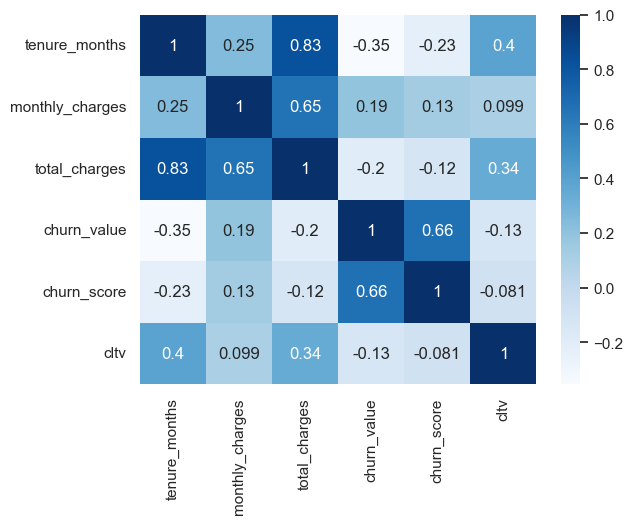

In [31]:
sns.heatmap(correlation, annot=True, cmap="Blues")

### Churn Distribution Visualization

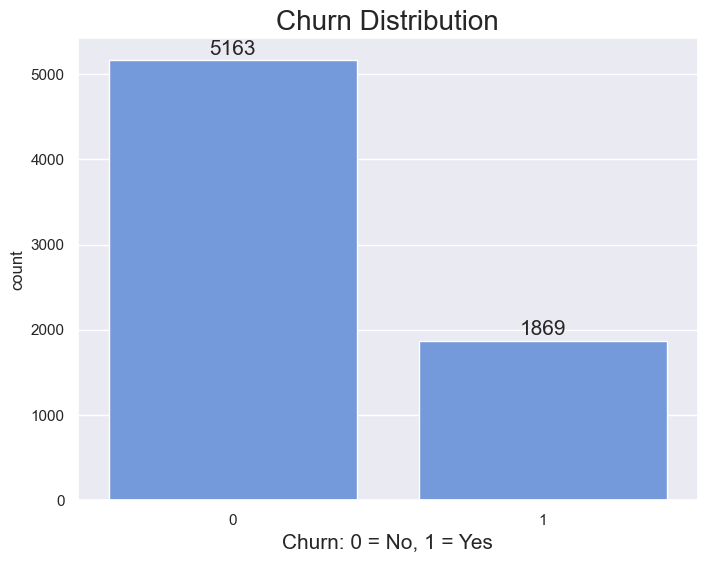

In [32]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x="churn_value", data=customer_churn,color='cornflowerblue')
plt.xlabel('Churn: 0 = No, 1 = Yes', size=15)
plt.title('Churn Distribution', size = 20)
for i in ax.patches:
    ax.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2,
                 i.get_height()), ha='center', va='center',
                 size=15, xytext=(0, 8),
                 textcoords='offset points');

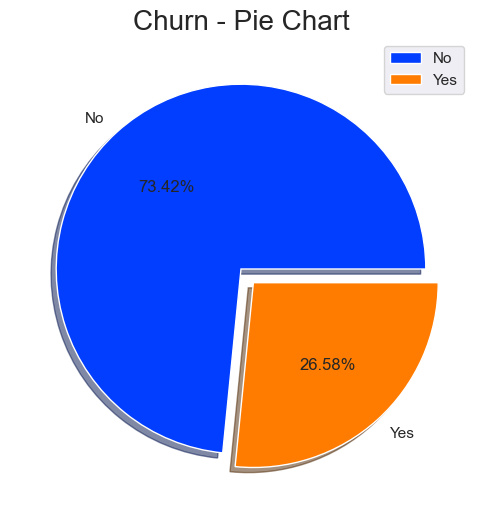

In [33]:
# Churn Percentage

plt.figure(figsize=(8,6))
explode = [0,0.1]
palette_color = sns.color_palette('bright')
plt.pie(x= customer_churn.churn_value.value_counts(), labels = ['No', 'Yes'], 
        autopct='%1.2f%%', shadow=True, explode = explode, colors=palette_color)
plt.title('Churn - Pie Chart', size = 20)
plt.legend()
plt.show()



### Contract Types distribution, proportions and Churn rates by Contract Types

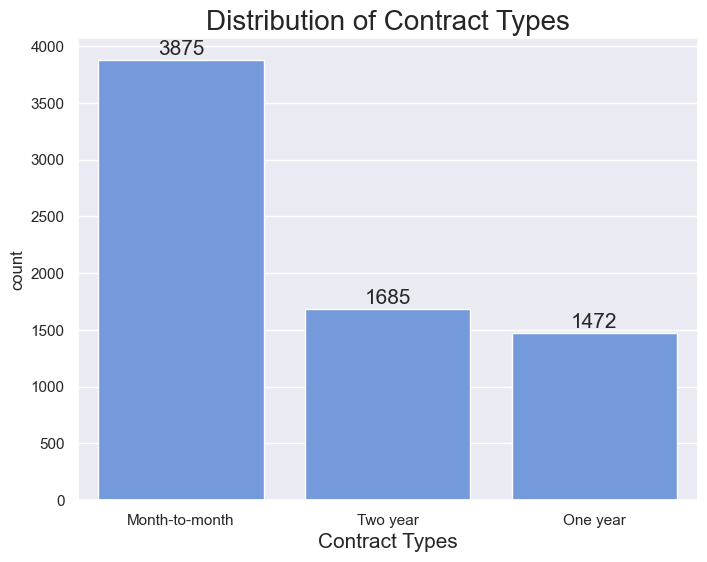

In [34]:
plt.figure(figsize=(8,6))

ax=sns.countplot(x='contract', data=customer_churn,color='cornflowerblue')
plt.xlabel('Contract Types', size = 15)
plt.title('Distribution of Contract Types', size = 20)
for i in ax.patches:
    ax.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2,
                 i.get_height()), ha='center', va='center',
                 size=15, xytext=(0, 8),
                 textcoords='offset points');

In [35]:
gender_proportion = pd.DataFrame(customer_churn['gender'].value_counts(normalize=True))

contract_proportion = pd.DataFrame(customer_churn['contract'].value_counts(normalize=True))

internet_service_proportion = pd.DataFrame(customer_churn['internet_service'].value_counts(normalize=True))

churn_rate = pd.DataFrame(customer_churn['churn_value'].value_counts(normalize=True))

In [36]:
gender_proportion

,proportion
gender,
Male,0.504693
Female,0.495307


In [37]:
contract_proportion

,proportion
contract,
Month-to-month,0.551052
Two year,0.239619
One year,0.209329


In [38]:
internet_service_proportion

,proportion
internet_service,
Fiber optic,0.440273
DSL,0.343572
No,0.216155


In [39]:
churn_rate

,proportion
churn_value,
0,0.734215
1,0.265785


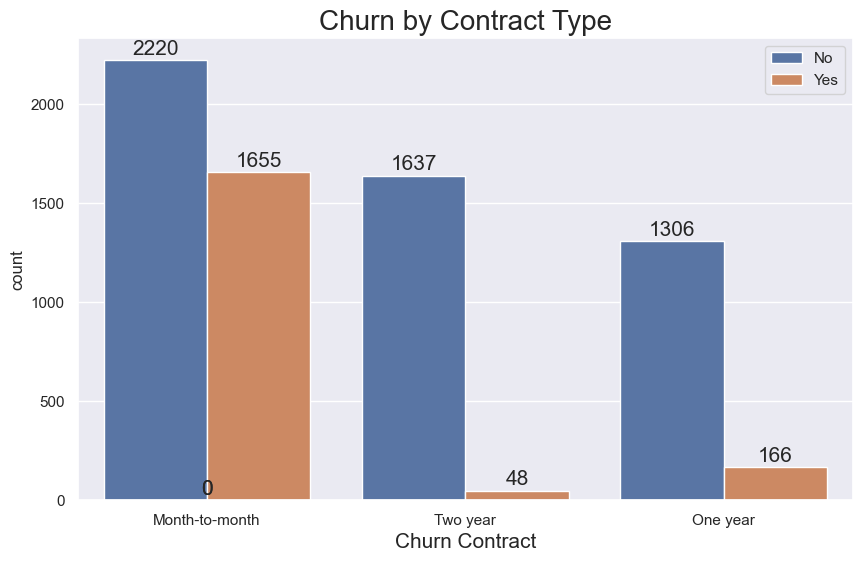

In [40]:
# Relationship between Contract Type and Churn
plt.figure(figsize=(10,6))

ax=sns.countplot(x='contract', hue='churn_value', data=customer_churn)
plt.xlabel('Churn Contract', size=15)
plt.legend(["No", "Yes"])
plt.title('Churn by Contract Type', size = 20)

for i in ax.patches:
    ax.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2,
                 i.get_height()), ha='center', va='center',
                 size=15, xytext=(0, 8),
                 textcoords='offset points');

##### Bringing it to perspective </br>

Churn Value 0 == Non- churn count</br>
            1 == Churn count

In [41]:
pd.DataFrame(customer_churn.churn_value.value_counts())

,count
churn_value,
0,5163
1,1869


### ❖	Feature Distribution: </br>
♦	For categorical features (e.g., Contract, PaymentMethod), use bar plots or count plots to visualize how different categories are distributed.</br>
♦	For numerical features (e.g., MonthlyCharges, TotalCharges, Tenure), use histograms or box plots to understand the distribution, central tendency, and any outliers.

### ❖	Churn Correlation:</br>
♦	Use box plots or violin plots to visualize the relationship between numerical features and churn </br>
♦	For categorical features, use stacked bar plots or grouped bar charts to compare churn rates across categories 

In [42]:
customer_churn[categorical_columns]

,city,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn_reason
0,Los Angeles,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Competitor made better offer
1,Los Angeles,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Moved
2,Los Angeles,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Moved
3,Los Angeles,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Moved
4,Los Angeles,Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Landers,Female,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),NaN
7028,Adelanto,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,NaN
7029,Amboy,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),NaN
7030,Angelus Oaks,Female,No,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN


In [43]:
customer_churn[numerical_columns]

,tenure_months,monthly_charges,total_charges,churn_value,churn_score,cltv
0,2,53.85,108.15,1,86,3239
1,2,70.70,151.65,1,67,2701
2,8,99.65,820.50,1,86,5372
3,28,104.80,3046.05,1,84,5003
4,49,103.70,5036.30,1,89,5340
...,...,...,...,...,...,...
7027,72,21.15,1419.40,0,45,5306
7028,24,84.80,1990.50,0,59,2140
7029,72,103.20,7362.90,0,71,5560
7030,11,29.60,346.45,0,59,2793


#### Categorical Column Distribution

In [44]:
categorical_columns

Index(['city', 'gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'churn_reason'],
      dtype='object')

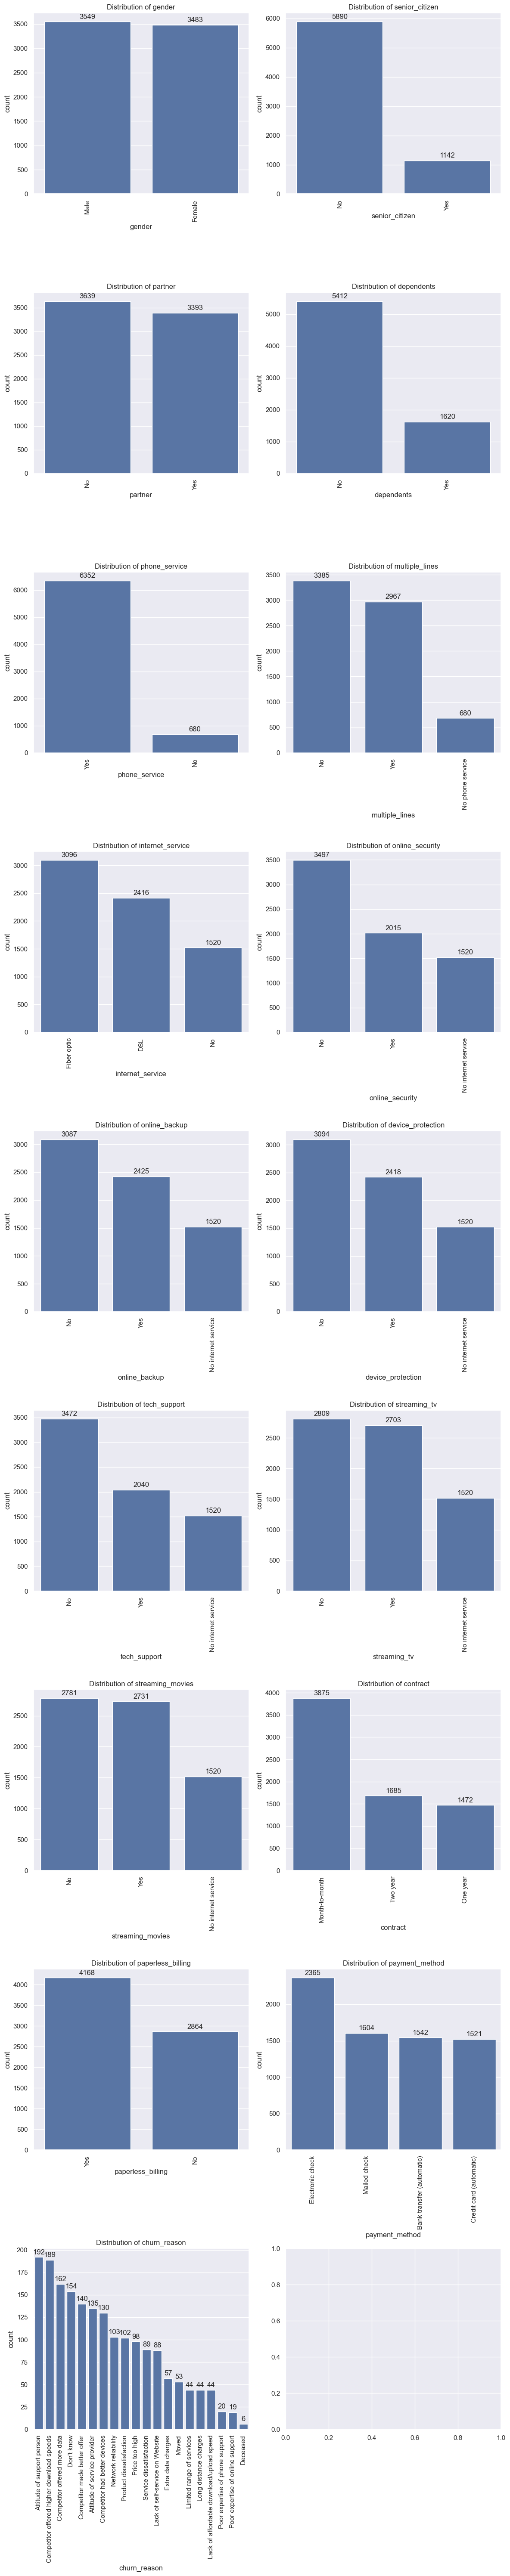

In [45]:
fig, axes = plt.subplots(9, 2, figsize=(12, 60))
for i, col, in enumerate(categorical_columns.drop(['city'])):
    ax = axes[i//2, i%2]
    sns.countplot(ax = ax, x = col, data = customer_churn, order = customer_churn[col].value_counts().index)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel(col)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    for i in ax.patches:
        ax.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2,
                 i.get_height()), ha='center', va='center',
                 size=12, xytext=(0, 8),
                 textcoords='offset points');

plt.tight_layout()
plt.show()

#### Numerical Column Distribution

In [46]:
numerical_columns

Index(['tenure_months', 'monthly_charges', 'total_charges', 'churn_value',
       'churn_score', 'cltv'],
      dtype='object')

tenure_months 
Skew = 0.23773083190513133


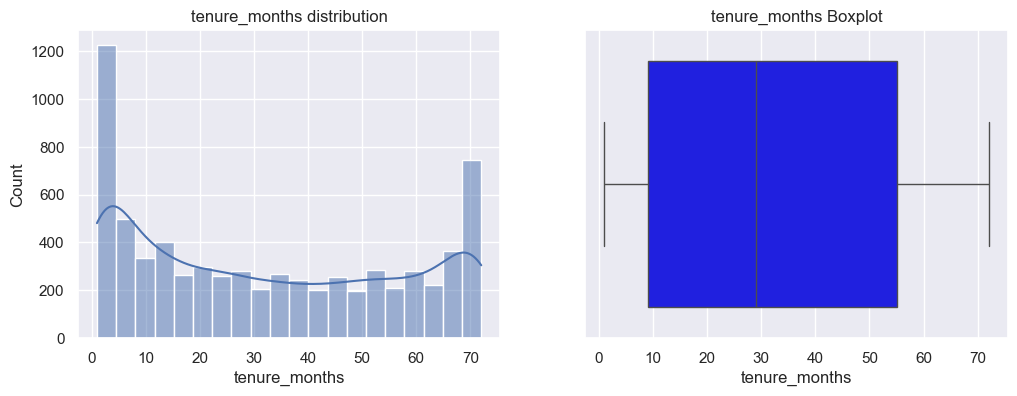

monthly_charges 
Skew = -0.22210292770166232


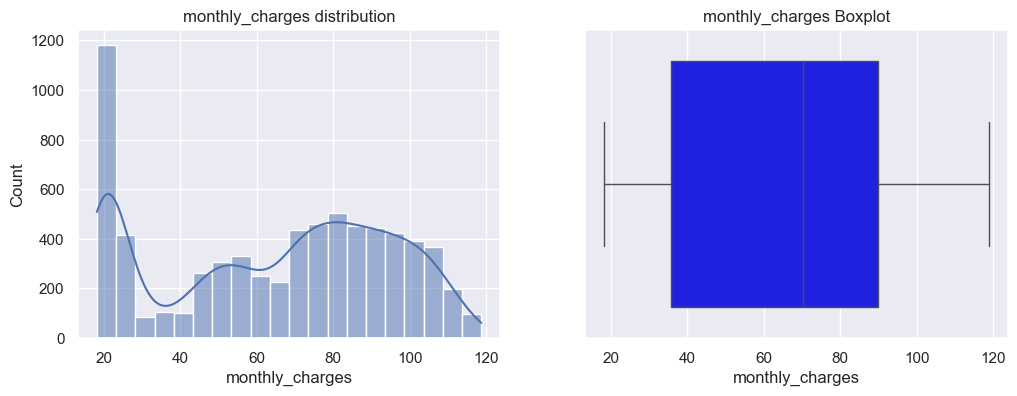

total_charges 
Skew = 0.9616424997242513


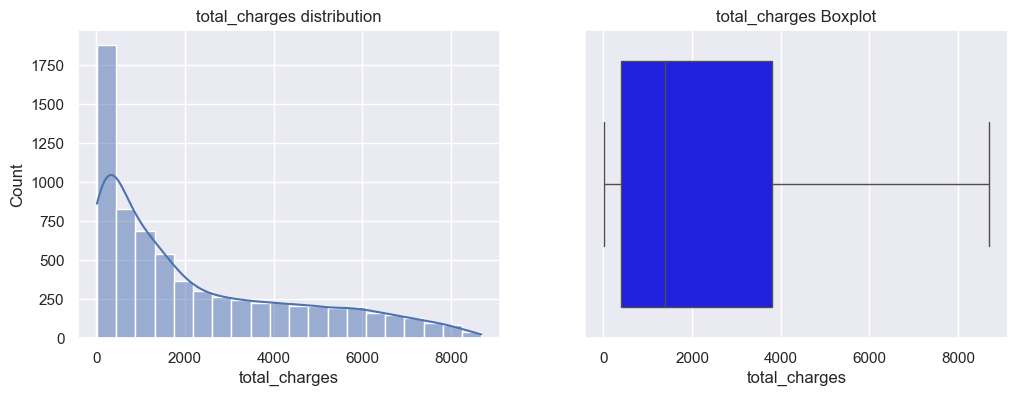

churn_value 
Skew = 1.060621768854348


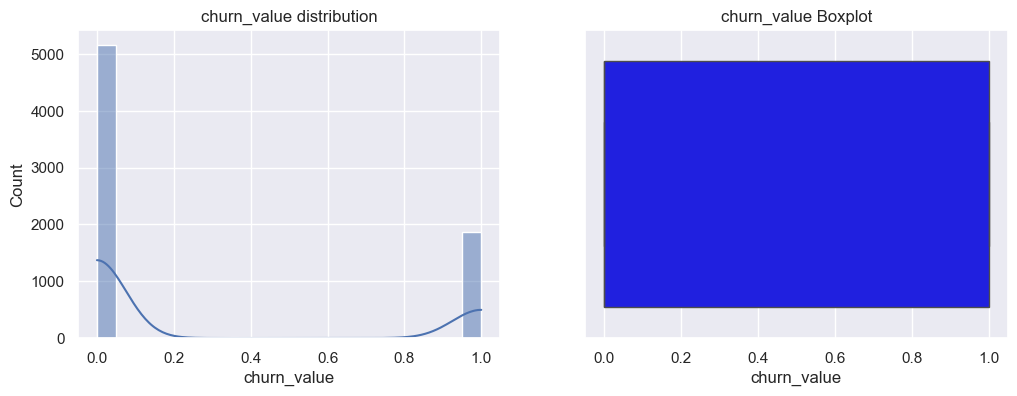

churn_score 
Skew = -0.09107471235065685


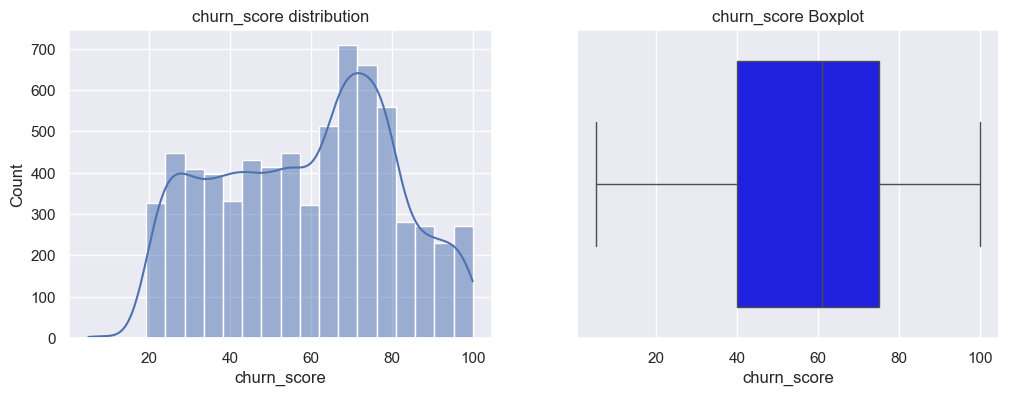

cltv 
Skew = -0.3113273648048447


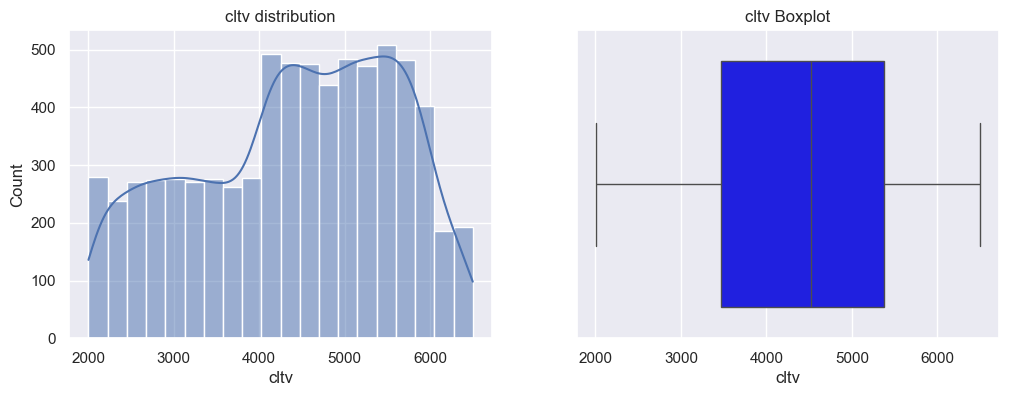

In [47]:
for cols in numerical_columns:
    skewness = customer_churn[cols].skew()
    print(f'{cols} \nSkew = {skewness}')
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    sns.histplot(customer_churn[cols], kde=True, bins=20)
    plt.title(f'{cols} distribution')
    plt.xlabel(cols)
    plt.ylabel("Count")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=customer_churn[cols], color= 'blue')
    plt.title(f'{cols} Boxplot')
    plt.xlabel(cols)
    plt.show()
    plt.show()

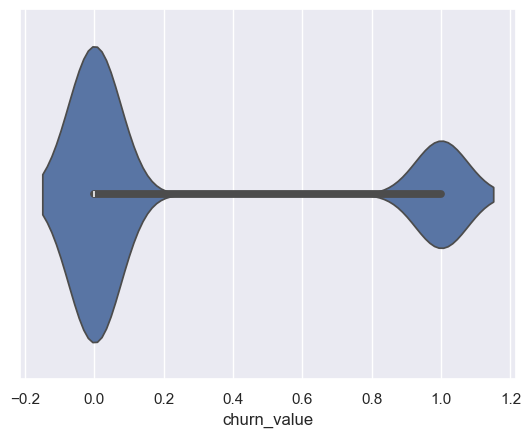

In [48]:
sns.violinplot(data=customer_churn,
               x = 'churn_value')
plt.show()

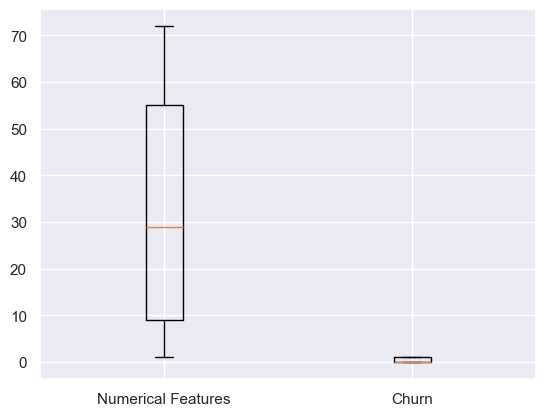

In [49]:
fig, ax = plt.subplots()
ax.boxplot([customer_churn["tenure_months"], customer_churn["churn_value"]])
ax.set_xticklabels(["Numerical Features", "Churn"])
# ax.set_ylabel("col")
plt.show()

<Axes: xlabel='churn_value'>

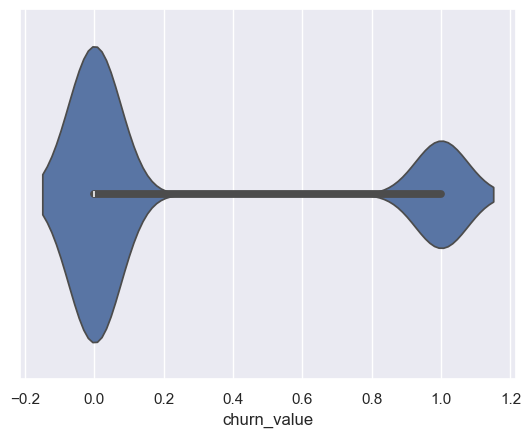

In [50]:
sns.violinplot(customer_churn[categorical_columns], x=customer_churn['churn_value'])

<Axes: xlabel='churn_value'>

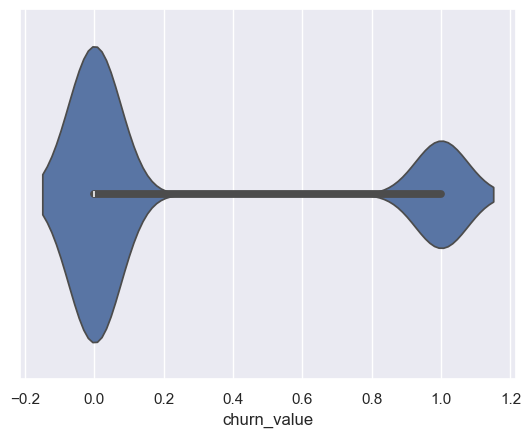

In [51]:
sns.violinplot(customer_churn[categorical_columns], x=customer_churn['churn_value'])

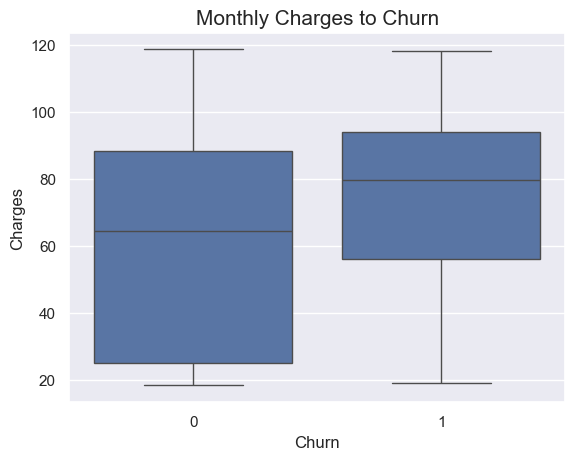

In [274]:
# Boxplot of Monthly Charges by Churn Label
sns.boxplot(x='churn_value', y='monthly_charges', data=customer_churn)
plt.title("Monthly Charges to Churn", size=15)
plt.xlabel('Churn')
plt.ylabel('Charges')
plt.show()

In [52]:
customer_churn[numerical_columns]

,tenure_months,monthly_charges,total_charges,churn_value,churn_score,cltv
0,2,53.85,108.15,1,86,3239
1,2,70.70,151.65,1,67,2701
2,8,99.65,820.50,1,86,5372
3,28,104.80,3046.05,1,84,5003
4,49,103.70,5036.30,1,89,5340
...,...,...,...,...,...,...
7027,72,21.15,1419.40,0,45,5306
7028,24,84.80,1990.50,0,59,2140
7029,72,103.20,7362.90,0,71,5560
7030,11,29.60,346.45,0,59,2793


#### Formatting Categorical Colunms

In [53]:
customer_churn[categorical_columns]

for c in categorical_columns:
    customer_churn[c] = customer_churn[c].str.lower().str.replace(' ', '_')

customer_churn[categorical_columns]
for c in categorical_columns:
    customer_churn[c] = customer_churn[c].str.lower().str.replace('-', '_')

customer_churn[categorical_columns]

,city,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn_reason
0,los_angeles,male,no,no,no,yes,no,dsl,yes,yes,no,no,no,no,month_to_month,yes,mailed_check,competitor_made_better_offer
1,los_angeles,female,no,no,yes,yes,no,fiber_optic,no,no,no,no,no,no,month_to_month,yes,electronic_check,moved
2,los_angeles,female,no,no,yes,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month_to_month,yes,electronic_check,moved
3,los_angeles,female,no,yes,yes,yes,yes,fiber_optic,no,no,yes,yes,yes,yes,month_to_month,yes,electronic_check,moved
4,los_angeles,male,no,no,yes,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month_to_month,yes,bank_transfer_(automatic),competitor_had_better_devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,landers,female,no,no,no,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,yes,bank_transfer_(automatic),NaN
7028,adelanto,male,no,yes,yes,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,yes,mailed_check,NaN
7029,amboy,female,no,yes,yes,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,one_year,yes,credit_card_(automatic),NaN
7030,angelus_oaks,female,no,yes,yes,no,no_phone_service,dsl,yes,no,no,no,no,no,month_to_month,yes,electronic_check,NaN


In [54]:
customer_churn

,city,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,...,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_value,churn_score,cltv,churn_reason
0,los_angeles,male,no,no,no,2,yes,no,dsl,yes,...,no,month_to_month,yes,mailed_check,53.85,108.15,1,86,3239,competitor_made_better_offer
1,los_angeles,female,no,no,yes,2,yes,no,fiber_optic,no,...,no,month_to_month,yes,electronic_check,70.70,151.65,1,67,2701,moved
2,los_angeles,female,no,no,yes,8,yes,yes,fiber_optic,no,...,yes,month_to_month,yes,electronic_check,99.65,820.50,1,86,5372,moved
3,los_angeles,female,no,yes,yes,28,yes,yes,fiber_optic,no,...,yes,month_to_month,yes,electronic_check,104.80,3046.05,1,84,5003,moved
4,los_angeles,male,no,no,yes,49,yes,yes,fiber_optic,no,...,yes,month_to_month,yes,bank_transfer_(automatic),103.70,5036.30,1,89,5340,competitor_had_better_devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,landers,female,no,no,no,72,yes,no,no,no_internet_service,...,no_internet_service,two_year,yes,bank_transfer_(automatic),21.15,1419.40,0,45,5306,NaN
7028,adelanto,male,no,yes,yes,24,yes,yes,dsl,yes,...,yes,one_year,yes,mailed_check,84.80,1990.50,0,59,2140,NaN
7029,amboy,female,no,yes,yes,72,yes,yes,fiber_optic,no,...,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,0,71,5560,NaN
7030,angelus_oaks,female,no,yes,yes,11,no,no_phone_service,dsl,yes,...,no,month_to_month,yes,electronic_check,29.60,346.45,0,59,2793,NaN


# Week 2: Problem Understanding and Model Selection

### 	Feature Engineering:
o	Analyze categorical and numerical features.</br>
o	Encode categorical features appropriately (One-Hot Encoding, Label Encoding).</br>
o	Create new features, if relevant, based on customer behavior (e.g., average usage time, frequency of interactions).</br>
### 	Data Transformation:
o	Normalize or scale features (e.g., MinMaxScaler or StandardScaler) to ensure consistent scales for all numeric features.</br>


### Data Splitting

In [55]:
# Separating the columns and preprocessing it for modelling
X = customer_churn.drop(columns= ['churn_reason', 'churn_value'], axis=1)
y = customer_churn['churn_value']

In [56]:
# Checking the data shapes
X.shape, y.shape

((7032, 22), (7032,))

### Import the ColumnTransformer

In [57]:
from sklearn.compose import ColumnTransformer

#### Importing Train & Test Splitting Module

In [58]:
from sklearn.model_selection import train_test_split

##### Using the train_test split library to split the data to defined rate

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, # defined training and target values as above
                                                    test_size=0.2, # Test size of 20%
                                                    random_state=42)

#### Import Scaling and Encoding libraries

In [60]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [61]:
categorical_columns = categorical_columns.drop('churn_reason')

In [62]:
categorical_columns

Index(['city', 'gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method'],
      dtype='object')

### Instantiating the Needed Numerical Column devoid of the Target Column 'y'

In [63]:
numerical_columns = ['tenure_months', 'monthly_charges', 'total_charges', 'churn_score', 'cltv']

### Using the Imported Column Transformer to combine the scaling and encoding. Encoding and scaling is an integral aspect of statistical modelling as it helps to covert the columns to a readable array

In [64]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown = 'ignore', drop='first'), categorical_columns)
    ]
)

### Using SciKit Learn Pipeline.

Pipeline is a set of tasks happening in sequence, where the output of a task becomes the input of the next one, until it outputs the 
final product at the end.</br> 
The nice thing about pipelines is that they
make our data preparation faster. </br>
The purpose of a pipeline is to chain multiple steps together, where
each step in the pipeline typically applies a specific transformation 
to the data. </br>
By using a pipeline, we can ensure that the same preprocessing steps are 
applied to both the training and test sets in the same way, avoiding data
leakage or inconsistencies.</br>
Once we have defined our pipeline, we can fit it to our training data & 
use it to make predictions on new, unseen data.</br> https://scikit-learn.org/1.5/modules/generated/sklearn.pipeline.Pipeline.html

In [65]:
from sklearn.pipeline import Pipeline

## Identifying the Problem Type:

#### This Project task is a classification type used to predict basically 0s and 1s i.e Yes or No (Churn or No Churn)

#### It is a classification type of prediction because customer churn (churn_value) target column is to predict when a customer will churn or not. The churn_value holds 0 and 1 (no and yes)


## Training the models without Hyper parameter tuning

#### Libraries to be used are:
##### 1. Logistic Regression
##### 2. Decision Tree
##### 3. Random Forest
##### 4. XGBoost, and
##### 5. Gradient Boost


### Training
#### 1. Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression #importing the classification module

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

In [67]:
# Fitting the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure_months',
                                                   'monthly_charges',
                                                   'total_charges',
                                                   'churn_score', 'cltv']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['city', 'gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method'],
      dtype='object'))])),
                ('model', LogisticRegression())])

##### Prediction, Tests, ROC-AUC, Accuracy, Recall, Confusion Matrix, Classification Report etc

In [68]:
test_pred = pipeline.predict(X_test)

In [69]:
test_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
train_pred = pipeline.predict(X_train)

In [71]:
train_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [73]:
accuracy = accuracy_score(y_train, train_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 93.80%


In [74]:
accuracy = accuracy_score(y_test, test_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 91.40%


In [75]:
precision = precision_score(y_train, train_pred)
print(f"Model Precision: {precision * 100:.2f}%")

Model Precision: 88.82%


In [76]:
precision = precision_score(y_test, test_pred)
print(f"Model Precision: {precision * 100:.2f}%")

Model Precision: 85.13%


In [77]:
recall = recall_score(y_train, train_pred)
print(f"Model Recall: {recall * 100:.2f}%")

Model Recall: 87.31%


In [78]:
recall = recall_score(y_test, test_pred)
print(f"Model Recall: {recall * 100:.2f}%")

Model Recall: 84.05%


In [79]:
f1 = f1_score(y_train, train_pred)
print(f"Model f1 Score: {f1 * 100:.2f}%")

Model f1 Score: 88.06%


In [80]:
f1 = f1_score(y_test, test_pred)
print(f"Model f1 Score: {f1 * 100:.2f}%")

Model f1 Score: 84.59%


In [81]:
tn, fp, fn, tp = confusion_matrix(y_train, train_pred).ravel()
specificity = tn / (tn + fp)
print(f"Model specificity Score: {specificity * 100:.2f}%")

Model specificity Score: 96.10%


In [82]:
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
specificity = tn / (tn + fp)
print(f"Model specificity Score: {specificity * 100:.2f}%")

Model specificity Score: 94.27%


In [83]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

Confusion Matrix:
[[954  58]
 [ 63 332]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1012
           1       0.85      0.84      0.85       395

    accuracy                           0.91      1407
   macro avg       0.89      0.89      0.89      1407
weighted avg       0.91      0.91      0.91      1407



In [84]:
pipeline.score(X_train, y_train), pipeline.score(X_test, y_test)

(0.9379555555555555, 0.914001421464108)

In [85]:
# roc_auc
y_pred = pipeline.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train: ', auc)


y_pred = pipeline.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print('test: ', auc)

train:  0.984749714557673
test:  0.9728498524040627


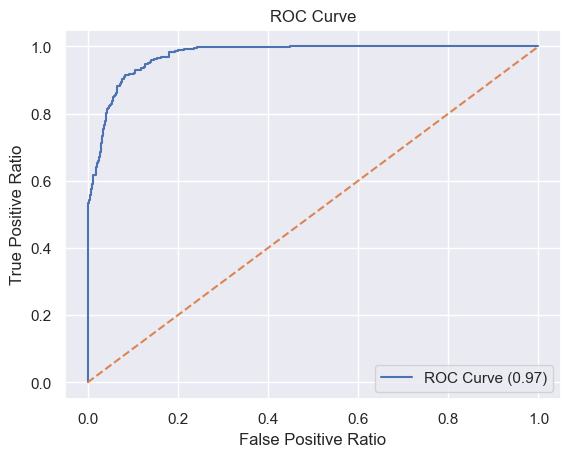

In [86]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label = f'ROC Curve ({auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### 2. Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier())
])

In [88]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure_months',
                                                   'monthly_charges',
                                                   'total_charges',
                                                   'churn_score', 'cltv']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['city', 'gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier())])

In [89]:
test_pred = pipeline.predict(X_test)

In [90]:
train_pred = pipeline.predict(X_train)

In [91]:
accuracy = accuracy_score(y_test, test_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 91.90%


In [92]:
pipeline.score(X_train, y_train), pipeline.score(X_test, y_test)

(1.0, 0.9189765458422174)

In [93]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

Confusion Matrix:
[[959  53]
 [ 61 334]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1012
           1       0.86      0.85      0.85       395

    accuracy                           0.92      1407
   macro avg       0.90      0.90      0.90      1407
weighted avg       0.92      0.92      0.92      1407



In [94]:
# roc_auc
y_pred = pipeline.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train: ', auc)


y_pred = pipeline.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print('test: ', auc)

train:  1.0
test:  0.8965990393755942


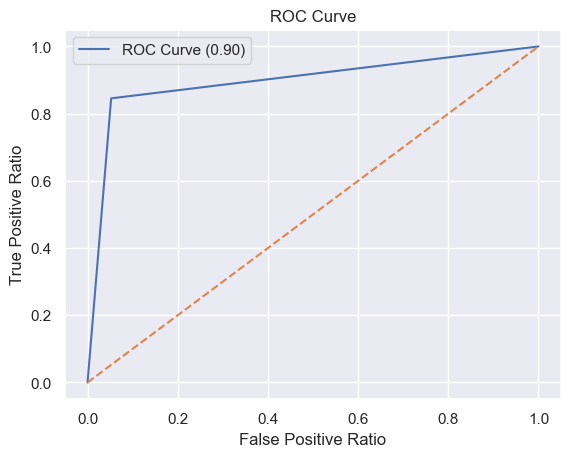

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label = f'ROC Curve ({auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### 3. Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])

In [97]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure_months',
                                                   'monthly_charges',
                                                   'total_charges',
                                                   'churn_score', 'cltv']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['city', 'gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method'],
      dtype='object'))])),
                ('model', RandomForestClassifier())])

In [98]:
test_pred = pipeline.predict(X_test)

In [99]:
train_pred = pipeline.predict(X_train)

In [100]:
accuracy = accuracy_score(y_test, test_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 92.18%


In [101]:
pipeline.score(X_train, y_train), pipeline.score(X_test, y_test)

(1.0, 0.92181947405828)

In [102]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

Confusion Matrix:
[[976  36]
 [ 74 321]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1012
           1       0.90      0.81      0.85       395

    accuracy                           0.92      1407
   macro avg       0.91      0.89      0.90      1407
weighted avg       0.92      0.92      0.92      1407



In [103]:
# roc_auc
y_pred = pipeline.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train: ', auc)


y_pred = pipeline.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print('test: ', auc)

train:  1.0
test:  0.9652661730124581


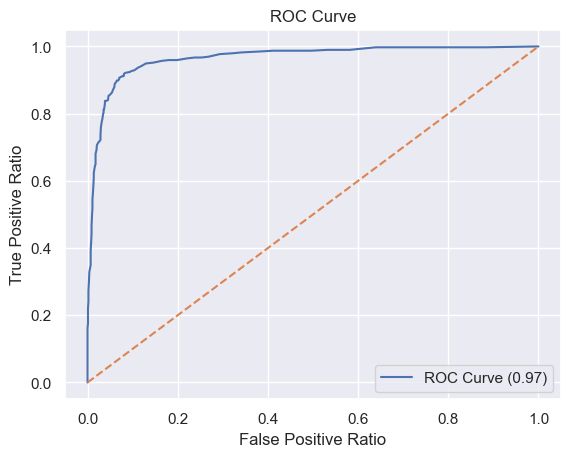

In [104]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label = f'ROC Curve ({auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### 4. XGBoost

In [105]:
from xgboost import XGBClassifier

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier())
])

In [106]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure_months',
                                                   'monthly_charges',
                                                   'total_charges',
                                                   'churn_score', 'cltv']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['city', 'gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_securi...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [107]:
train_pred = pipeline.predict(X_train)

In [108]:
test_pred = pipeline.predict(X_test)

In [109]:
accuracy = accuracy_score(y_test, test_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 92.04%


In [110]:
pipeline.score(X_train, y_train), pipeline.score(X_test, y_test)

(0.9998222222222222, 0.9203980099502488)

In [111]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

Confusion Matrix:
[[962  50]
 [ 62 333]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1012
           1       0.87      0.84      0.86       395

    accuracy                           0.92      1407
   macro avg       0.90      0.90      0.90      1407
weighted avg       0.92      0.92      0.92      1407



In [112]:
# roc_auc
y_pred = pipeline.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train: ', auc)


y_pred = pipeline.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print('test: ', auc)

train:  1.0
test:  0.9779831890728975


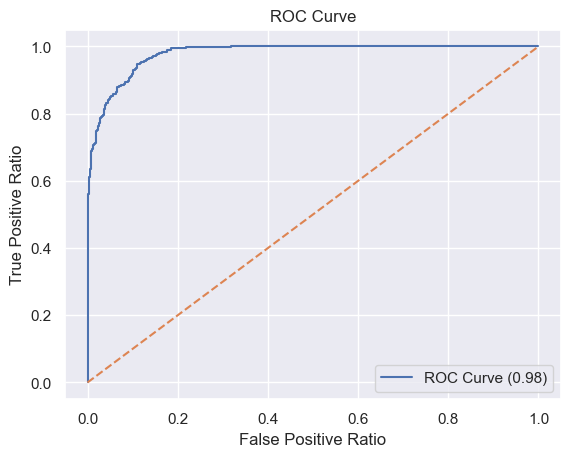

In [113]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label = f'ROC Curve ({auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### 5. Gradient Boost

In [114]:
from sklearn.ensemble import GradientBoostingClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier())
])

In [115]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure_months',
                                                   'monthly_charges',
                                                   'total_charges',
                                                   'churn_score', 'cltv']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['city', 'gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method'],
      dtype='object'))])),
                ('model', GradientBoostingClassifier())])

In [116]:
train_pred = pipeline.predict(X_train)

In [117]:
test_pred = pipeline.predict(X_test)

In [118]:
accuracy = accuracy_score(y_test, test_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 92.82%


In [119]:
pipeline.score(X_train, y_train), pipeline.score(X_test, y_test)

(0.9408, 0.9282160625444208)

In [120]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

Confusion Matrix:
[[971  41]
 [ 60 335]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1012
           1       0.89      0.85      0.87       395

    accuracy                           0.93      1407
   macro avg       0.92      0.90      0.91      1407
weighted avg       0.93      0.93      0.93      1407



In [121]:
# roc_auc
y_pred = pipeline.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train: ', auc)


y_pred = pipeline.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print('test: ', auc)

train:  0.9883811162535585
test:  0.9825699204482914


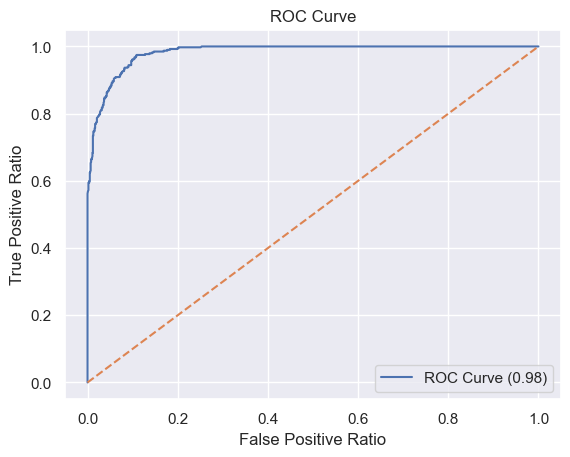

In [122]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label = f'ROC Curve ({auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 	Hyperparameter Tuning:
o	Tune the models' hyperparameters using GridSearchCV or RandomizedSearchCV to find the best configurations.


# GRID SEARCH

## Using Grid Search CV to determine best fit for hyperparameter Tuning

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")


def hyperparameter_tuning_test(X, y):
    """
    Function to perform hyperparameter tuning on Logistic Regression, Decision Tree,
    Random Forest, XGBoost and Gradient Boost models.
    """

    from sklearn.model_selection import train_test_split
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Preprocessing setup (from earlier steps)
    # Define transformers for numerical and categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_columns),
            ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_columns)
        ]
    )

    # Define model pipelines for Logistic Regression, Decision Tree, Random Forest, XGBoost and Gradient Boost.
    pipelines = {
        'Logistic Regression': Pipeline(steps=[('preprocessor', preprocessor), ('model', LogisticRegression())]),
        'Decision Tree': Pipeline(steps=[('preprocessor', preprocessor), ('model', DecisionTreeClassifier())]),
        'Random Forest': Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestClassifier())]),
        'XGBoost': Pipeline(steps=[('preprocessor', preprocessor), ('model', XGBClassifier(eval_metric='logloss'))]),
        'GradBoost': Pipeline(steps=[('preprocessor', preprocessor), ('model', GradientBoostingClassifier(random_state=42))])
    }

    # Hyperparameter grids for different models
    param_grids = {
        'Logistic Regression': {'model__C': [0.01, 0.1, 1, 10, 100], 'model__solver': ['lbfgs','newton-cg','liblinear','sag','saga'], 'model__max_iter'  : [100,1000,2500,3000,5000]},
        'Decision Tree': {'model__max_depth': [3, 5, 10], 'model__min_samples_split': [2, 5, 10, 15]},
        'Random Forest': {'model__n_estimators': [50, 100, 150], 'model__max_depth': [2, 5, 10, 15], 'model__min_samples_split': [2, 5,8, 10]},
        'XGBoost': {'model__n_estimators': [50, 100, 300], 'model__max_depth': [3, 5, 8,10], 'model__learning_rate': [0.01, 0.1, 0.15, 0.2, 0.25, 0.3]},
        'GradBoost': {'model__n_estimators': [50, 100, 300], 'model__max_depth': [3, 5, 8,10], 'model__learning_rate': [0.01, 0.1, 0.15, 0.2, 0.25, 0.3]}
    }

    # Perform hyperparameter tuning for each model and collect results
    best_models = {}
    for model_name, pipeline in pipelines.items():
        grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_models[model_name] = (grid_search.best_estimator_, grid_search.best_score_)

    return best_models


best_models_results = hyperparameter_tuning_test(X_train, y_train)

In [124]:
best_models_results

{'Logistic Regression': (Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('num', StandardScaler(),
                                                    ['tenure_months',
                                                     'monthly_charges',
                                                     'total_charges',
                                                     'churn_score', 'cltv']),
                                                   ('cat',
                                                    OneHotEncoder(drop='first',
                                                                  handle_unknown='ignore'),
                                                    Index(['city', 'gender', 'senior_citizen', 'partner', 'dependents',
         'phone_service', 'multiple_lines', 'internet_service',
         'online_security', 'online_backup', 'device_protection', 'tech_support',
         'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',


##### Retesting Logistic Regression with Improved Hyper Parameter values

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")


def hyperparameter_tuning_test(X, y):
    """
    Function to perform hyperparameter tuning on Logistic Regression, Decision Tree,
    Random Forest, XGBoost and Gradient Boost models.
    """

    from sklearn.model_selection import train_test_split
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Preprocessing setup (from earlier steps)
    # Define transformers for numerical and categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_columns),
            ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_columns)
        ]
    )

    # Define model pipelines for Logistic Regression, Decision Tree, Random Forest, XGBoost and Gradient Boost.
    pipelines = {
        'Logistic Regression': Pipeline(steps=[('preprocessor', preprocessor), ('model', LogisticRegression())])
    }

    # Hyperparameter grids for different models
    param_grids = {
        'Logistic Regression': {'model__C': [0.01, 0.1, 1, 10, 100], 'model__solver': ['lbfgs','newton-cg','liblinear','sag','saga'], 'model__max_iter'  : [100,1000,2500,3000,5000], 'model__n_jobs':[ -1]}
    }

    # Perform hyperparameter tuning for each model and collect results
    best_models = {}
    for model_name, pipeline in pipelines.items():
        grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_models[model_name] = (grid_search.best_estimator_, grid_search.best_score_)

    return best_models


best_models_results = hyperparameter_tuning_test(X_train, y_train)

In [126]:
best_models_results

{'Logistic Regression': (Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('num', StandardScaler(),
                                                    ['tenure_months',
                                                     'monthly_charges',
                                                     'total_charges',
                                                     'churn_score', 'cltv']),
                                                   ('cat',
                                                    OneHotEncoder(drop='first',
                                                                  handle_unknown='ignore'),
                                                    Index(['city', 'gender', 'senior_citizen', 'partner', 'dependents',
         'phone_service', 'multiple_lines', 'internet_service',
         'online_security', 'online_backup', 'device_protection', 'tech_support',
         'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',


### Testing the Grid Search fit result

#### 1. Logistic Regression

In [127]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(C=0.1, max_iter=3000, n_jobs=-1, solver='saga'))
])

In [128]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure_months',
                                                   'monthly_charges',
                                                   'total_charges',
                                                   'churn_score', 'cltv']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['city', 'gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(C=0.1, max_iter=3000, n_jobs=-1,
                                    solver='saga'))])

In [129]:
train_pred = pipeline.predict(X_train)

In [130]:
test_pred = pipeline.predict(X_test)

In [131]:
accuracy = accuracy_score(y_test, test_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 92.18%


In [132]:
pipeline.score(X_train, y_train), pipeline.score(X_test, y_test)

(0.9269333333333334, 0.92181947405828)

In [133]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

Confusion Matrix:
[[965  47]
 [ 63 332]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1012
           1       0.88      0.84      0.86       395

    accuracy                           0.92      1407
   macro avg       0.91      0.90      0.90      1407
weighted avg       0.92      0.92      0.92      1407



In [134]:
# roc_auc
y_pred = pipeline.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train: ', auc)


y_pred = pipeline.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print('test: ', auc)

train:  0.9780275600164352
test:  0.9734927703006956


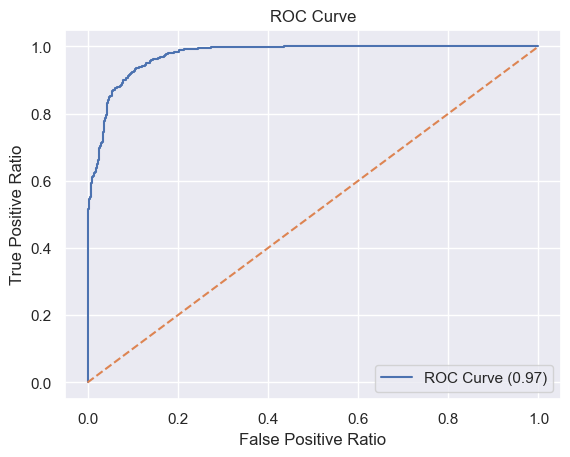

In [135]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label = f'ROC Curve ({auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### 2. Decision Tree

In [200]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(max_depth=5, min_samples_split=5))
])

In [137]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure_months',
                                                   'monthly_charges',
                                                   'total_charges',
                                                   'churn_score', 'cltv']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['city', 'gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method'],
      dtype='object'))])),
                ('model',
                 DecisionTreeClassifier(max_depth=5, min_samples_split=5))])

In [138]:
train_pred = pipeline.predict(X_train)

In [139]:
test_pred = pipeline.predict(X_test)

In [140]:
accuracy = accuracy_score(y_test, test_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 91.76%


In [141]:
pipeline.score(X_train, y_train), pipeline.score(X_test, y_test)

(0.9237333333333333, 0.9175550817341862)

In [142]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

Confusion Matrix:
[[970  42]
 [ 74 321]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1012
           1       0.88      0.81      0.85       395

    accuracy                           0.92      1407
   macro avg       0.91      0.89      0.90      1407
weighted avg       0.92      0.92      0.92      1407



In [143]:
# roc_auc
y_pred = pipeline.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train: ', auc)


y_pred = pipeline.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print('test: ', auc)

train:  0.9801265785132288
test:  0.9759806374143193


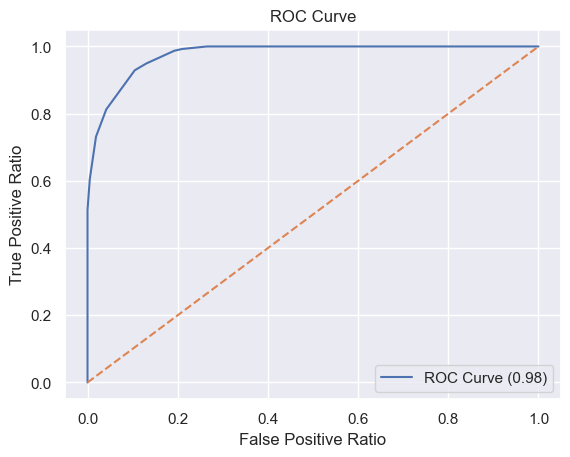

In [144]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label = f'ROC Curve ({auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 3. Random Forest

In [145]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # ('model', RandomForestClassifier(max_depth=30,  max_features=7,n_estimators=100,min_samples_split=15))
    ('model', RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=50))
])

In [146]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure_months',
                                                   'monthly_charges',
                                                   'total_charges',
                                                   'churn_score', 'cltv']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['city', 'gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=10, min_samples_split=10,
                                        n_estimators=50))])

In [147]:
test_pred = pipeline.predict(X_test)

In [148]:
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [149]:
train_pred = pipeline.predict(X_train)

In [150]:
train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [151]:
pipeline.score(X_train, y_train)

0.8816

In [152]:
pipeline.score(X_test, y_test)

0.8606965174129353

In [153]:
accuracy = accuracy_score(y_train, train_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 88.16%


In [154]:
accuracy = accuracy_score(y_test, test_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 86.07%


In [155]:
precision = precision_score(y_train, train_pred)
print(f"Model Precision: {precision * 100:.2f}%")

Model Precision: 95.50%


In [156]:
precision = precision_score(y_test, test_pred)
print(f"Model Precision: {precision * 100:.2f}%")

Model Precision: 95.02%


In [157]:
recall = recall_score(y_train, train_pred)
print(f"Model Recall: {recall * 100:.2f}%")

Model Recall: 57.53%


In [158]:
recall = recall_score(y_test, test_pred)
print(f"Model Recall: {recall * 100:.2f}%")

Model Recall: 53.16%


In [159]:
f1 = f1_score(y_train, train_pred)
print(f"Model f1 Score: {f1 * 100:.2f}%")

Model f1 Score: 71.80%


In [160]:
f1 = f1_score(y_test, test_pred)
print(f"Model f1 Score: {f1 * 100:.2f}%")

Model f1 Score: 68.18%


In [161]:
tn, fp, fn, tp = confusion_matrix(y_train, train_pred).ravel()
specificity = tn / (tn + fp)
print(f"Model specificity Score: {specificity * 100:.2f}%")

Model specificity Score: 99.04%


In [162]:
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
specificity = tn / (tn + fp)
print(f"Model specificity Score: {specificity * 100:.2f}%")

Model specificity Score: 98.91%


In [163]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

Confusion Matrix:
[[1001   11]
 [ 185  210]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1012
           1       0.95      0.53      0.68       395

    accuracy                           0.86      1407
   macro avg       0.90      0.76      0.80      1407
weighted avg       0.87      0.86      0.85      1407



In [164]:
# roc_auc
y_pred = pipeline.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train: ', auc)


y_pred = pipeline.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print('test: ', auc)

train:  0.9664072053390217
test:  0.9556511732626207


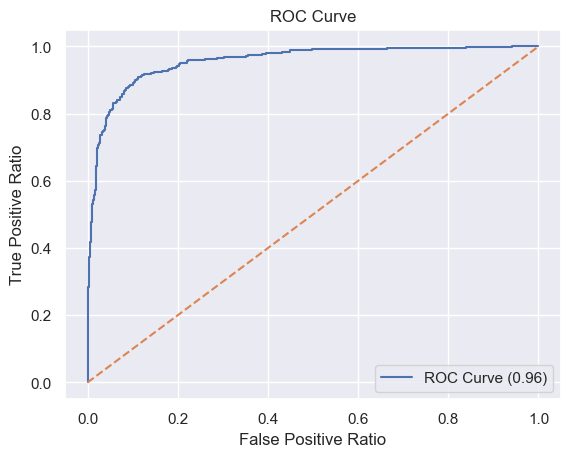

In [165]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label = f'ROC Curve ({auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### 4. XGBoost

In [166]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(max_depth=3, eval_metric='logloss', learning_rate=0.2, n_estimators=50))
])

In [167]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure_months',
                                                   'monthly_charges',
                                                   'total_charges',
                                                   'churn_score', 'cltv']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['city', 'gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_securi...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [168]:
train_pred = pipeline.predict(X_train)

In [169]:
test_pred = pipeline.predict(X_test)

In [170]:
accuracy = accuracy_score(y_test, test_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 92.61%


In [171]:
pipeline.score(X_train, y_train), pipeline.score(X_test, y_test)

(0.9448888888888889, 0.9260838663823738)

In [172]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

Confusion Matrix:
[[962  50]
 [ 54 341]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1012
           1       0.87      0.86      0.87       395

    accuracy                           0.93      1407
   macro avg       0.91      0.91      0.91      1407
weighted avg       0.93      0.93      0.93      1407



In [173]:
# roc_auc
y_pred = pipeline.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train: ', auc)


y_pred = pipeline.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print('test: ', auc)

train:  0.9882046862553269
test:  0.9832428578576075


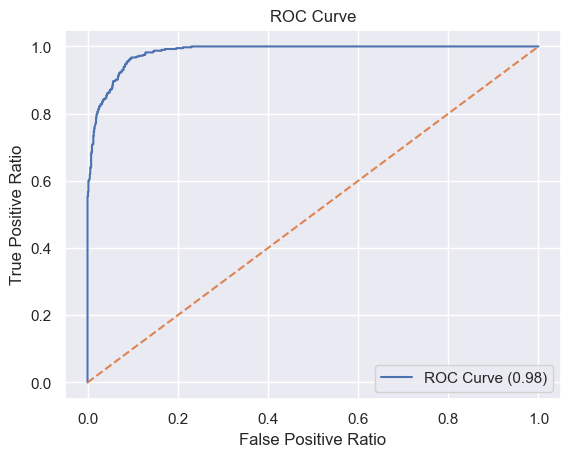

In [174]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label = f'ROC Curve ({auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')
plt.legend()
plt.show()

####  5.  Gradient Boost

In [175]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(learning_rate=0.25, n_estimators=50, random_state=42))
])

In [176]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure_months',
                                                   'monthly_charges',
                                                   'total_charges',
                                                   'churn_score', 'cltv']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['city', 'gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method'],
      dtype='object'))])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.25, n_estimators=50,
                                            random_state=42))])

In [177]:
train_pred = pipeline.predict(X_train)

In [178]:
test_pred = pipeline.predict(X_test)

In [179]:
accuracy = accuracy_score(y_test, test_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 93.18%


In [180]:
pipeline.score(X_train, y_train), pipeline.score(X_test, y_test)

(0.9454222222222223, 0.9317697228144989)

In [181]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

Confusion Matrix:
[[972  40]
 [ 56 339]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1012
           1       0.89      0.86      0.88       395

    accuracy                           0.93      1407
   macro avg       0.92      0.91      0.91      1407
weighted avg       0.93      0.93      0.93      1407



In [182]:
# roc_auc
y_pred = pipeline.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train: ', auc)


y_pred = pipeline.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print('test: ', auc)

train:  0.9896884470139611
test:  0.9828513533796968


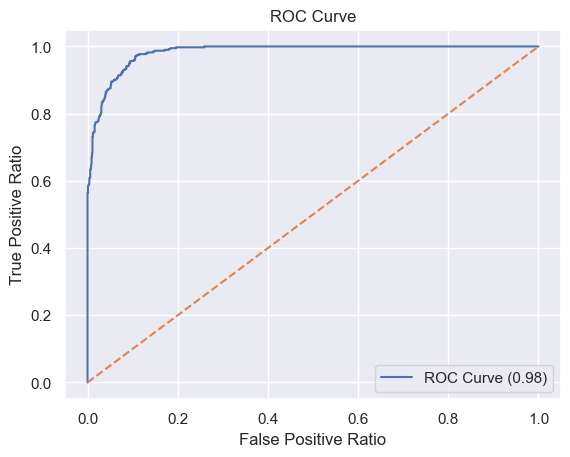

In [183]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label = f'ROC Curve ({auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Week 3: Model Evaluation and Business Insights

###	Cross-Validation:
	Applying cross-validation (k-fold) to ensure the model generalizes well to unseen data.

In [248]:
from sklearn.model_selection import KFold, cross_val_score

In [249]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 6328, Test set:704
Fold:2, Train set: 6328, Test set:704
Fold:3, Train set: 6329, Test set:703
Fold:4, Train set: 6329, Test set:703
Fold:5, Train set: 6329, Test set:703
Fold:6, Train set: 6329, Test set:703
Fold:7, Train set: 6329, Test set:703
Fold:8, Train set: 6329, Test set:703
Fold:9, Train set: 6329, Test set:703
Fold:10, Train set: 6329, Test set:703


#### K-Fold Linear Regression

In [250]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(C=0.1, max_iter=3000, n_jobs=-1, solver='saga'))
])

In [251]:
score = cross_val_score(pipeline, X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.3f}".format(score.mean())}')

Scores for each fold are: [0.91477273 0.92897727 0.92603129 0.90611664 0.92603129 0.92460882
 0.92034139 0.92176387 0.93029872 0.92460882]
Average score: 0.922


In [252]:
algorithms = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for algo in algorithms:
    score = cross_val_score(pipeline, X, y, cv= kf, scoring="accuracy")
    print(f'Average score({algo}): {"{:.3f}".format(score.mean())}')

Average score(newton-cg): 0.922
Average score(lbfgs): 0.922
Average score(liblinear): 0.922
Average score(sag): 0.922
Average score(saga): 0.922


#### K-Fold Random Forest Classifier

In [253]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(max_depth=10, n_estimators=50))
])

In [254]:
score = cross_val_score(pipeline, X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.3f}".format(score.mean())}')

Scores for each fold are: [0.82954545 0.84517045 0.85490754 0.84495021 0.86059744 0.88051209
 0.84352774 0.83783784 0.86913229 0.87197724]
Average score: 0.854


In [264]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(max_depth=5, min_samples_split=5))
])

In [265]:
score = cross_val_score(pipeline, X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.3f}".format(score.mean())}')

Scores for each fold are: [0.91335227 0.92755682 0.92887624 0.91749644 0.92176387 0.91749644
 0.90611664 0.91891892 0.91607397 0.91607397]
Average score: 0.918


In [257]:
pipeline=pipeline.fit(X_train, y_train)

In [258]:
pipeline.steps[1][1].feature_importances_

array([0.07174481, 0.        , 0.00411517, ..., 0.        , 0.        ,
       0.        ])

In [259]:
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(pipeline, X, y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(1): 0.918
Average score(2): 0.918
Average score(3): 0.918
Average score(4): 0.918
Average score(5): 0.918
Average score(6): 0.918
Average score(7): 0.918
Average score(8): 0.918
Average score(9): 0.918
Average score(10): 0.918


#### K-Fold Linear Gradient Boost

In [260]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(learning_rate=0.25, n_estimators=50,random_state=42))
])

In [261]:
score = cross_val_score(pipeline, X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.3f}".format(score.mean())}')

Scores for each fold are: [0.93039773 0.92471591 0.943101   0.92603129 0.94452347 0.92318634
 0.93456615 0.93172119 0.9374111  0.92460882]
Average score: 0.932


#### K-Fold Linear XGB Classifier

In [262]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(eval_metric='logloss', learning_rate=0.2,  max_depth=3,  n_estimators=50))
])

In [263]:
score = cross_val_score(pipeline, X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.3f}".format(score.mean())}')

Scores for each fold are: [0.93039773 0.92329545 0.943101   0.92176387 0.94025605 0.92460882
 0.93883357 0.93029872 0.94452347 0.92460882]
Average score: 0.932


#	Customer Insights:
	Analyze the top features that influence customer churn (e.g., service usage patterns, contract type, payment methods).
	Provide actionable insights that the business can implement to reduce churn (e.g., personalized offers for at-risk customers).


In [198]:
customer_churn['churn_reason'].value_counts() 

churn_reason
attitude_of_support_person                   192
competitor_offered_higher_download_speeds    189
competitor_offered_more_data                 162
don't_know                                   154
competitor_made_better_offer                 140
attitude_of_service_provider                 135
competitor_had_better_devices                130
network_reliability                          103
product_dissatisfaction                      102
price_too_high                                98
service_dissatisfaction                       89
lack_of_self_service_on_website               88
extra_data_charges                            57
moved                                         53
limited_range_of_services                     44
long_distance_charges                         44
lack_of_affordable_download/upload_speed      44
poor_expertise_of_phone_support               20
poor_expertise_of_online_support              19
deceased                                       6
Name: c

### Actionable Insights

	Churn reason states that customers churn due to poor customer service/support, network services and better competitor offers
	To reduce churn, services such as customer support, better internet access needs to be improved, improved offers to customers helps to reduce churn


<Axes: >

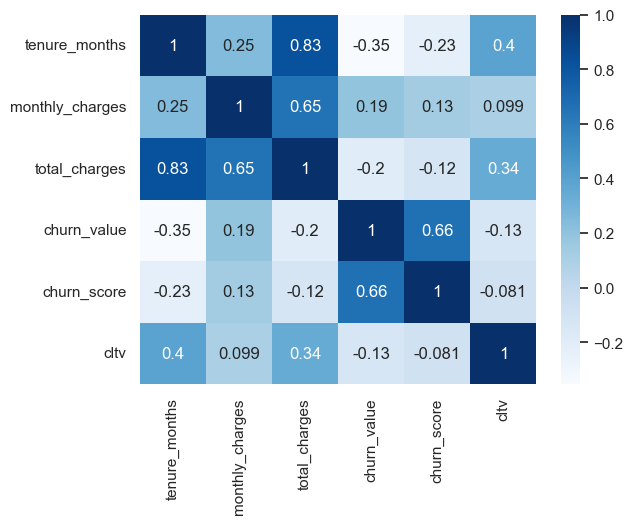

In [267]:
sns.heatmap(correlation, annot=True, cmap="Blues")

There is no direct corellation between monthly charges and churn


Customer churn majority is on monthly subscribers


# Best Performing Model

#### Gradient Boosting

In [275]:
# Training
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(learning_rate=0.25, n_estimators=50,random_state=42))
])

In [276]:
# Fitting the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure_months',
                                                   'monthly_charges',
                                                   'total_charges',
                                                   'churn_score', 'cltv']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['city', 'gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method'],
      dtype='object'))])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.25, n_estimators=50,
                                            random_state=42))])

In [277]:
train_pred = pipeline.predict(X_train)

In [278]:
test_pred = pipeline.predict(X_test)

In [279]:
pipeline.score(X_train, y_train), pipeline.score(X_test, y_test)

(0.9454222222222223, 0.9317697228144989)

In [280]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

Confusion Matrix:
[[972  40]
 [ 56 339]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1012
           1       0.89      0.86      0.88       395

    accuracy                           0.93      1407
   macro avg       0.92      0.91      0.91      1407
weighted avg       0.93      0.93      0.93      1407



In [281]:
# roc_auc
y_pred = pipeline.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train: ', auc)


y_pred = pipeline.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print('test: ', auc)

train:  0.9896884470139611
test:  0.9828513533796968


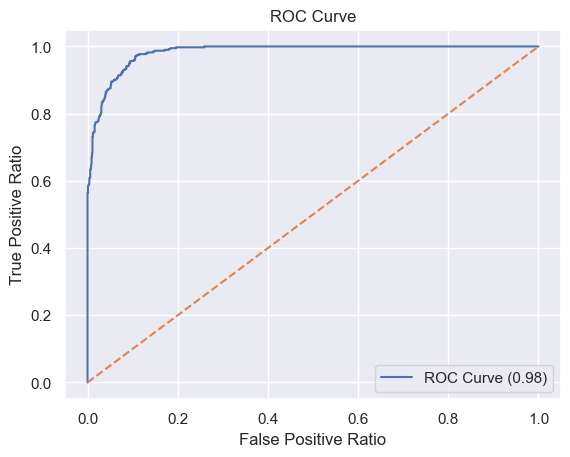

In [282]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label = f'ROC Curve ({auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [289]:
# Model Scoring
print(f'Model Score = {pipeline.score(X_test, y_test)*100:.2f}%')

Model Score = 93.18%


In [284]:
accuracy = accuracy_score(y_test, test_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 93.18%


#### Key Insights:
- Higher monthly charges and certain contract types correlate with likelihood of churn.
- Gradient Boosting model performed better, suggesting potential for more advanced tuning for improved accuracy.

## Report
This report made on this project can be viewed on Canva: https://www.canva.com/design/DAGUnah-xqA/ulFwQP0p6OT8eF146Sn53w/edit?utm_content=DAGUnah-xqA&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton